# Caracteristicas

In [17]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

import scipy.signal

fileName = 's17.mat'
#db = sio.loadmat(ruta+fileName)
db = sio.loadmat(fileName)


## Dataset description

La base de datos se le removieron los 3 segundos iniciales de acondicionamiento. El arreglo X contiene todas las respuestas emocionales de las señales biológicas, para 40 videos diferentes. El arreglo se organiza de la forma

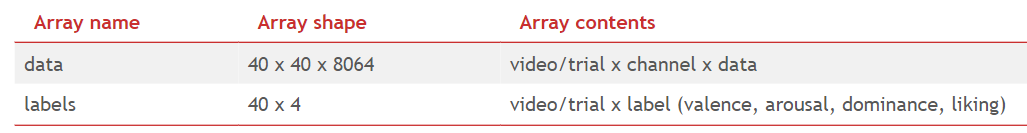

La siguiente tabla muestra el diseño de canales y el preprocesamiento realizado:

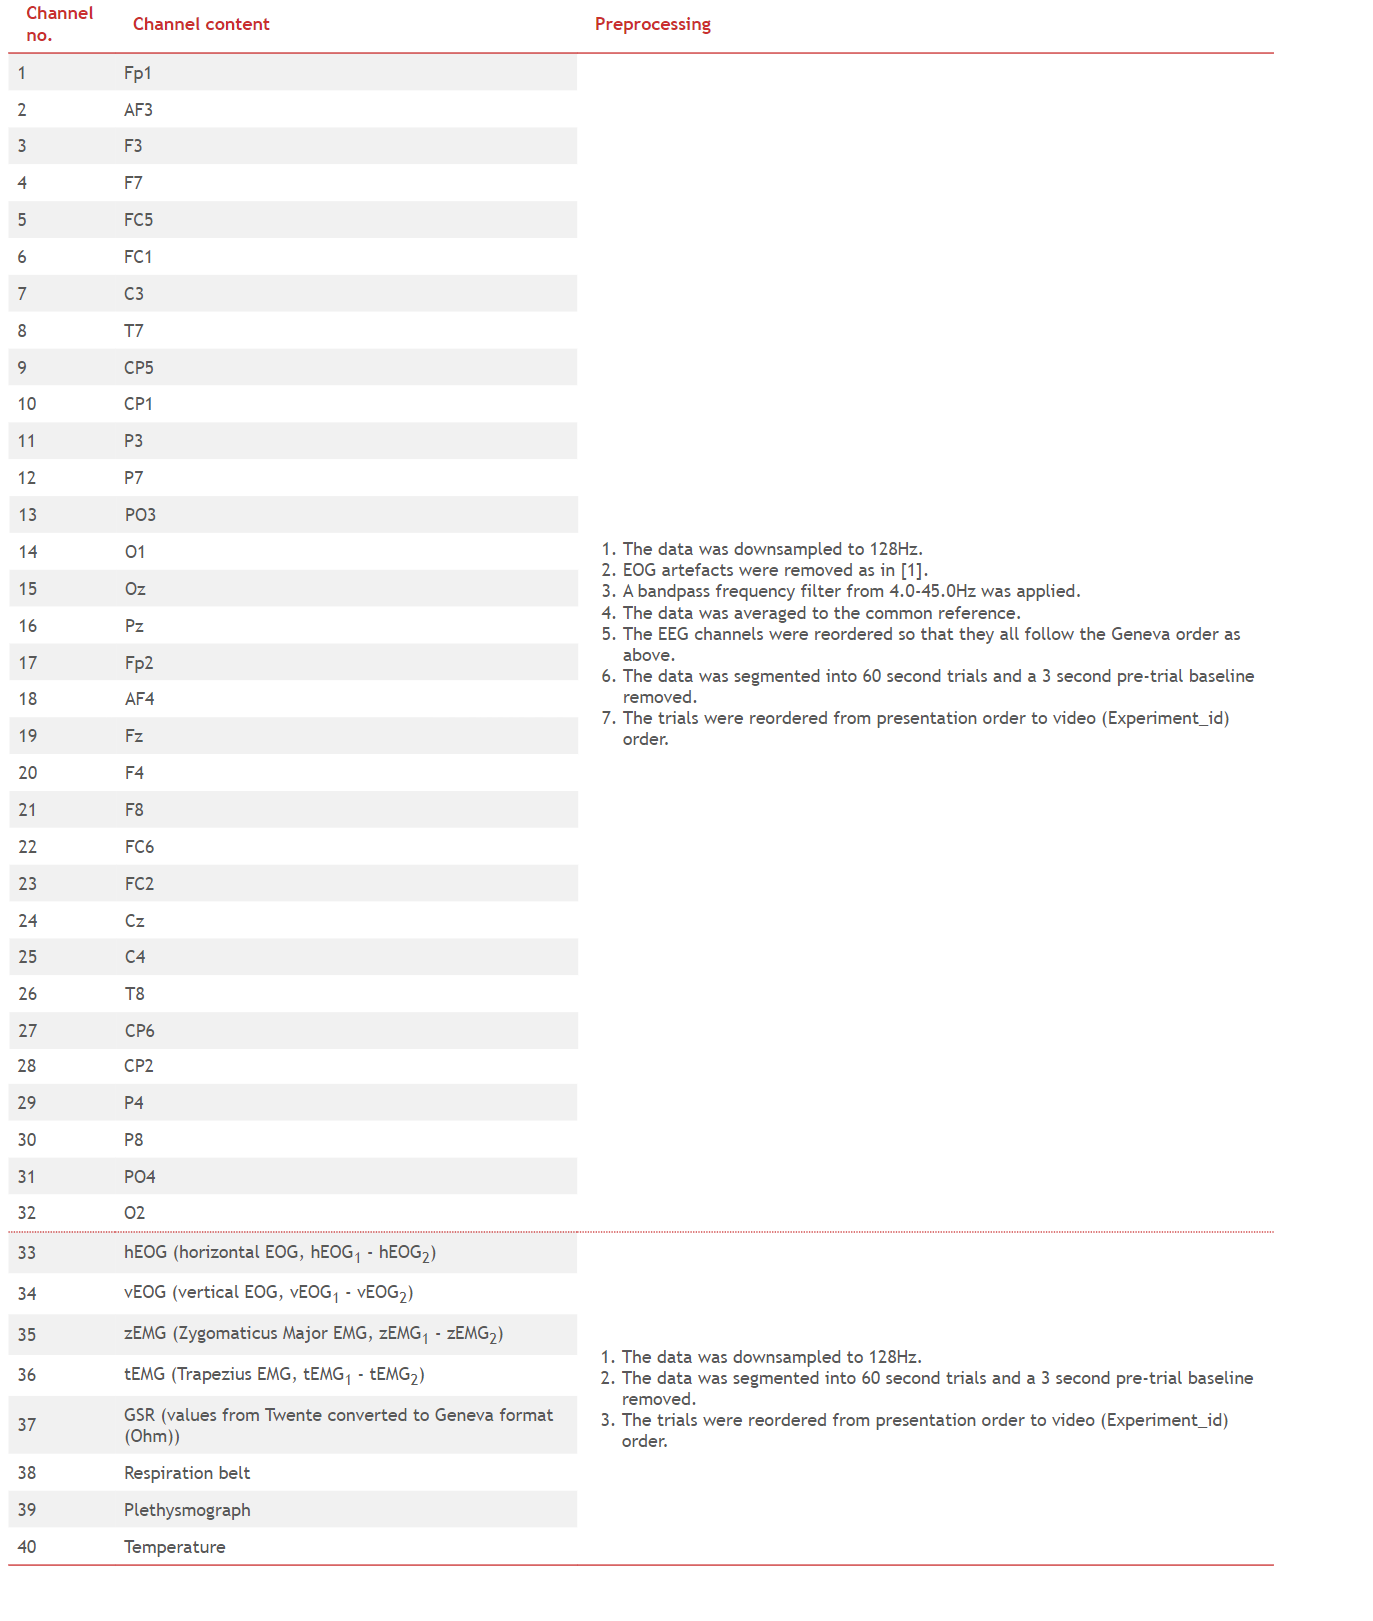

In [18]:
X = db['data']

## Caracteristicas temperatura de la piel

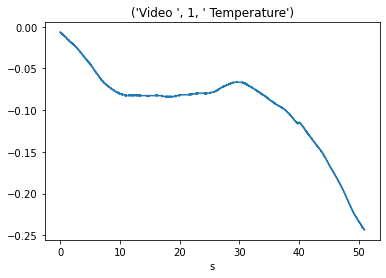

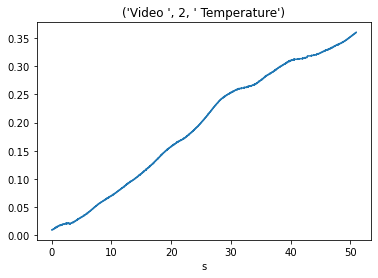

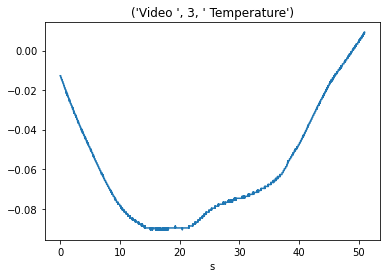

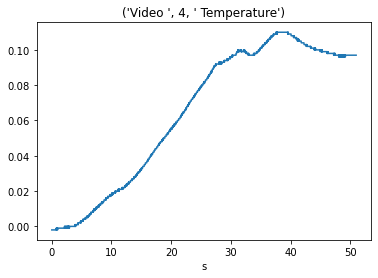

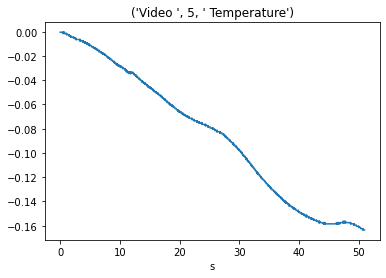

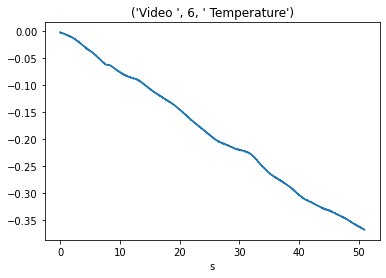

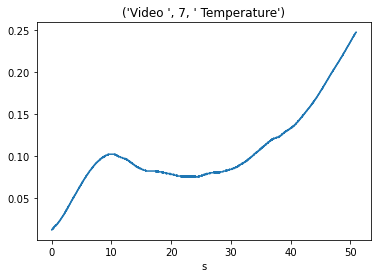

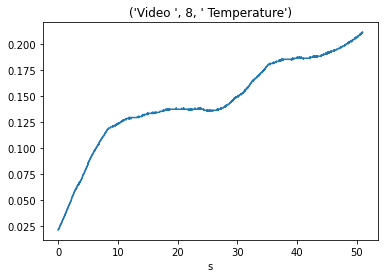

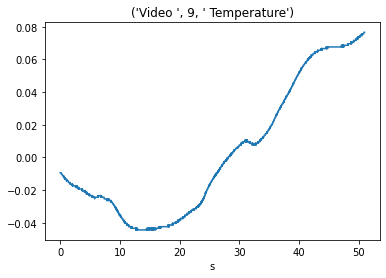

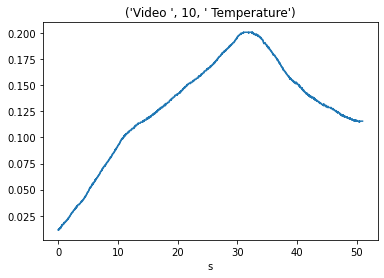

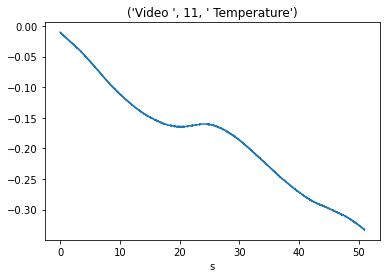

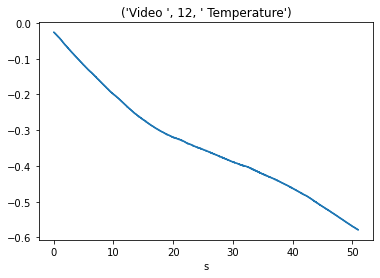

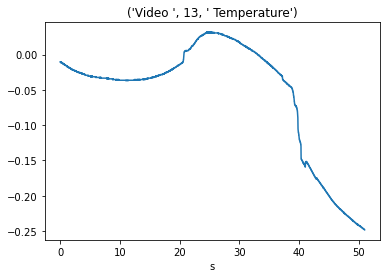

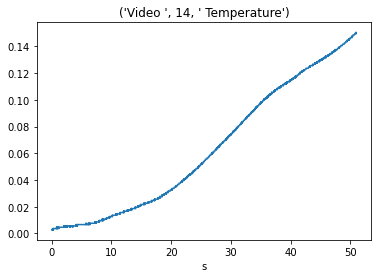

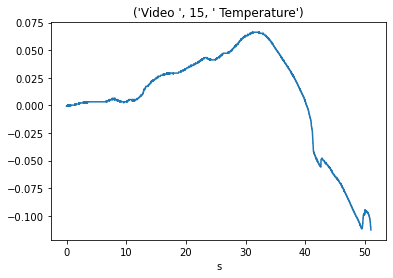

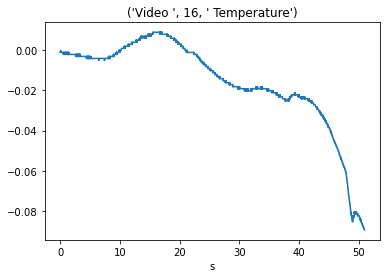

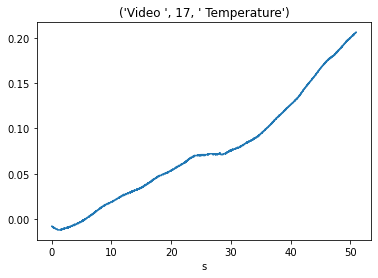

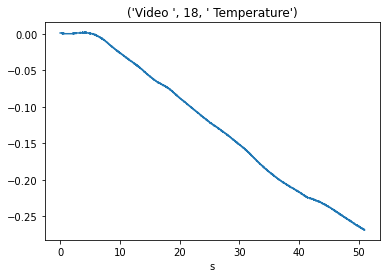

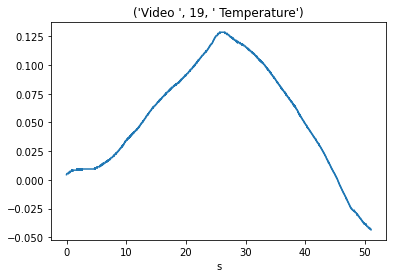

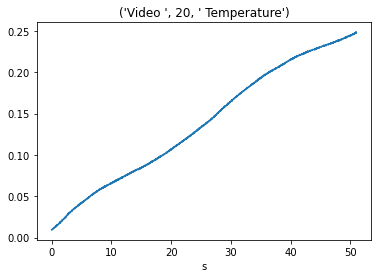

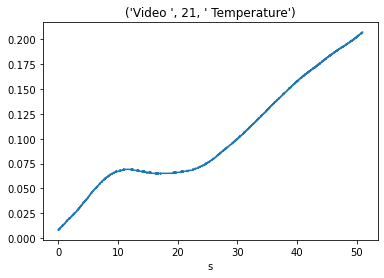

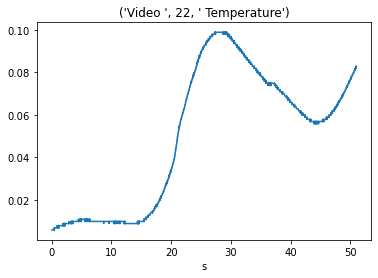

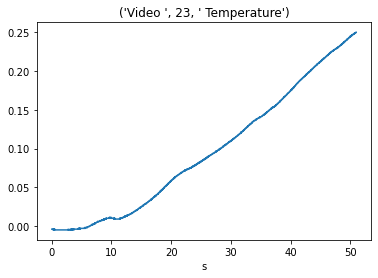

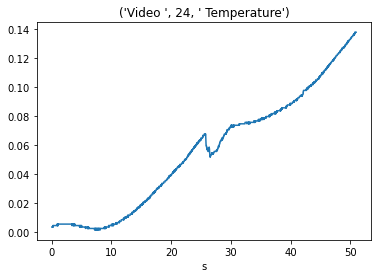

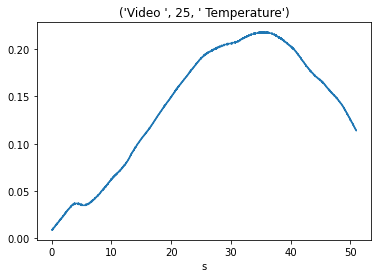

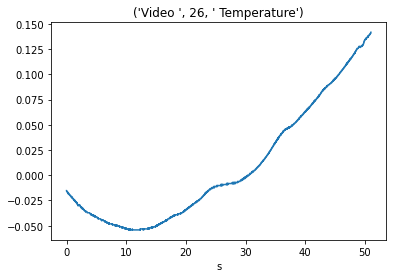

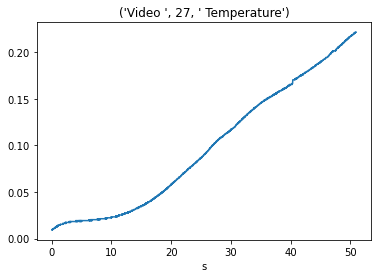

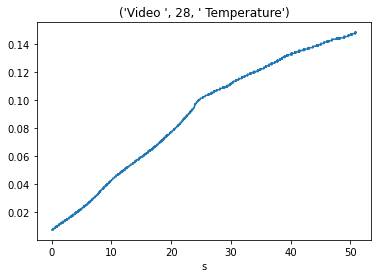

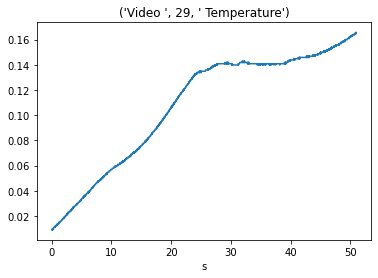

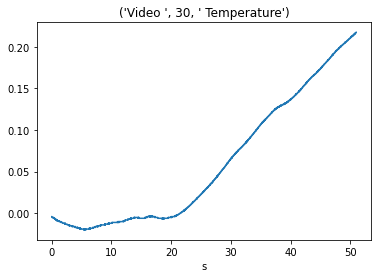

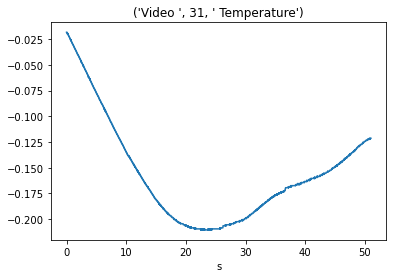

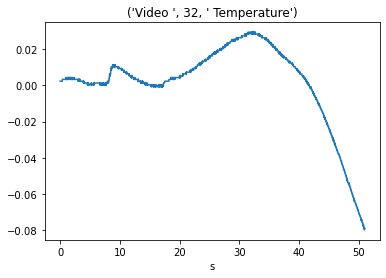

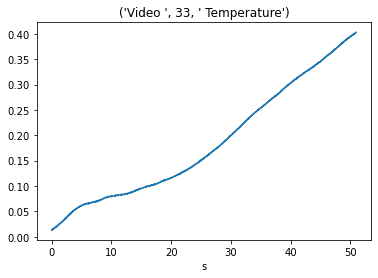

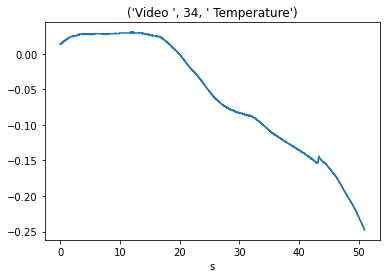

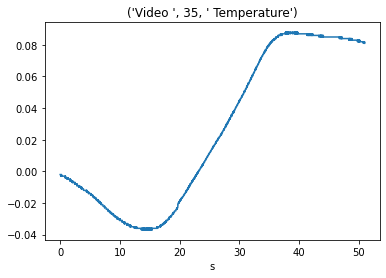

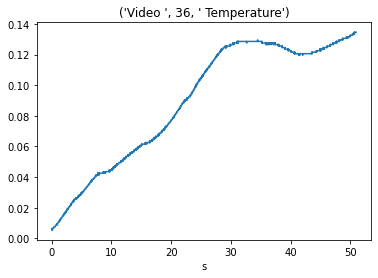

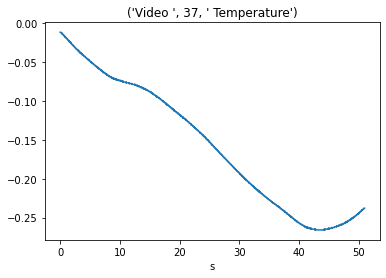

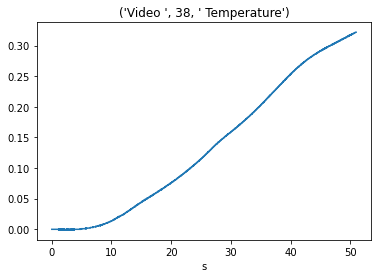

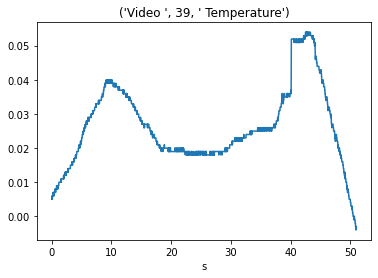

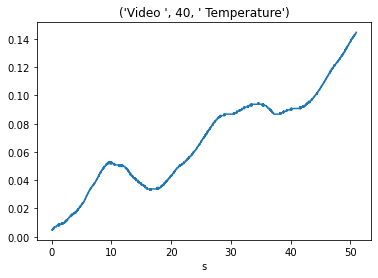

In [19]:
#trial = 15 # video u observación 
Temperature = []

for trial in range(40):
    channel = 40 # canal de la señal fisiológica
    Temperature = X[trial,channel-1,:] # : Saca toda la info
    #print(Temperature.shape)
    ts = len(Temperature)/128.
    time = np.linspace(0,ts,len(Temperature))
    fortitle = ('Video ',  trial+1, ' Temperature') 
    
    plt.plot(time,Temperature)
    plt.title(fortitle)
    #plt.ylabel('uV')
    plt.xlabel('s')
    plt.show()

### AVERAGE

In [20]:
# AVERAGE

# Average per video
for trial in range(40):
    channel = 40 # canal de la señal fisiológica
    Temperature = X[trial,channel-1,:] # : Saca toda la info
    #print(Temperature.shape)
    average = np.mean(Temperature)
    #fortitle = 'Video ', trial+1, 'AverageTemp= ', average
    print ('Video ', trial+1, 'AverageTemp= ', average)

# Total average
Temperature=[] 
for trial in range(40):
    channel = 40 # canal de la señal fisiológica
    Temperature.extend(X[trial,channel-1,:]) 
print('\n',np.array(Temperature).shape)
average = np.mean(Temperature)
#fortitle = 'Video ', trial+1, 'AverageTemp= ', average
print ('La temperatura promedio durante toda la prueba fue ',average)

Video  1 AverageTemp=  -0.09477360163730016
Video  2 AverageTemp=  0.1942260648827063
Video  3 AverageTemp=  -0.05932889655317279
Video  4 AverageTemp=  0.06476111860482729
Video  5 AverageTemp=  -0.08564320393912178
Video  6 AverageTemp=  -0.18870698732632624
Video  7 AverageTemp=  0.10604704785248924
Video  8 AverageTemp=  0.14482167349834557
Video  9 AverageTemp=  0.002866691204037227
Video  10 AverageTemp=  0.12926396846108426
Video  11 AverageTemp=  -0.1826987922635723
Video  12 AverageTemp=  -0.33921976436281054
Video  13 AverageTemp=  -0.054381656031378574
Video  14 AverageTemp=  0.06314870054292758
Video  15 AverageTemp=  0.007813625357207227
Video  16 AverageTemp=  -0.015807089096107556
Video  17 AverageTemp=  0.07555203423931023
Video  18 AverageTemp=  -0.1243859672478028
Video  19 AverageTemp=  0.054805057468054544
Video  20 AverageTemp=  0.1385961098975816
Video  21 AverageTemp=  0.10099640792032674
Video  22 AverageTemp=  0.049846174938499445
Video  23 AverageTemp=  0.0958

### AVERAGE OF ITS DERIVATIVE

In [21]:
# Average of its derivative
Temperature = [ ]

for trial in range(40):
    channel = 40 # canal de la señal fisiológica
    Temperature = X[trial,channel-1,:] # : Saca toda la info
    
    derivate1=np.diff(Temperature)
    #print (derivate1)
    average1 = np.mean(derivate1)
    print ('Video ', trial+1, 'AverageDiff= ', average1)
    
    ####################Con indice de cambio##########################
    #Ts = 1/128
    #Ts = 1/len(Temperature)
    #print(len(Temperature))
    #print('\nTs= ', Ts)
    
    #derivate = np.diff(Temperature)/Ts
    #print (derivate)
    #print(Temperature.shape)
    #average = np.average(derivate)
    #fortitle = 'Video ', trial+1, 'AverageTemp= ', average
    #print ('Video ', trial+1, 'AverageDiff= ', average)

Video  1 AverageDiff=  -3.631024403939636e-05
Video  2 AverageDiff=  5.377593104568854e-05
Video  3 AverageDiff=  3.3705711766528773e-06
Video  4 AverageDiff=  1.5167570294937404e-05
Video  5 AverageDiff=  -2.4972868263383226e-05
Video  6 AverageDiff=  -5.607404775704332e-05
Video  7 AverageDiff=  3.6003828477883553e-05
Video  8 AverageDiff=  2.9109478343820305e-05
Video  9 AverageDiff=  1.3175869145097612e-05
Video  10 AverageDiff=  1.5933609198722692e-05
Video  11 AverageDiff=  -4.948611318449506e-05
Video  12 AverageDiff=  -8.472390275859224e-05
Video  13 AverageDiff=  -3.6463451820153854e-05
Video  14 AverageDiff=  2.2521543771270955e-05
Video  15 AverageDiff=  -1.7159271444778286e-05
Video  16 AverageDiff=  -1.348228470661151e-05
Video  17 AverageDiff=  3.2786465081987076e-05
Video  18 AverageDiff=  -4.136610080437622e-05
Video  19 AverageDiff=  -7.353973476333551e-06
Video  20 AverageDiff=  3.661665960091135e-05
Video  21 AverageDiff=  3.048834837063339e-05
Video  22 AverageDiff=

### SPECTRAL POWER IN THE BANDS ([0 - 0.1]Hz, [0.1-0.2]Hz)

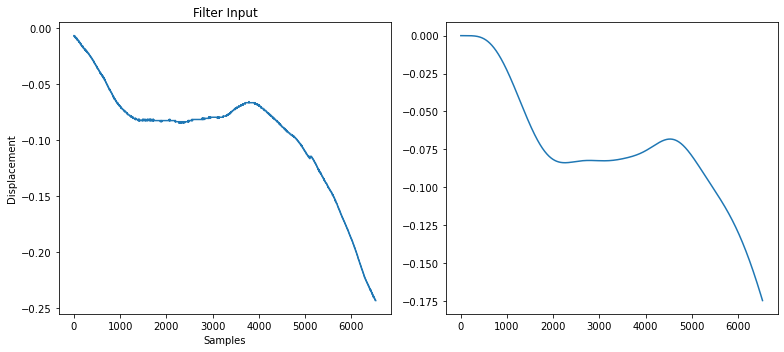

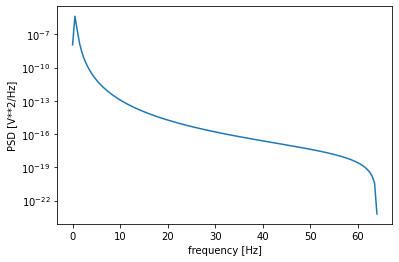

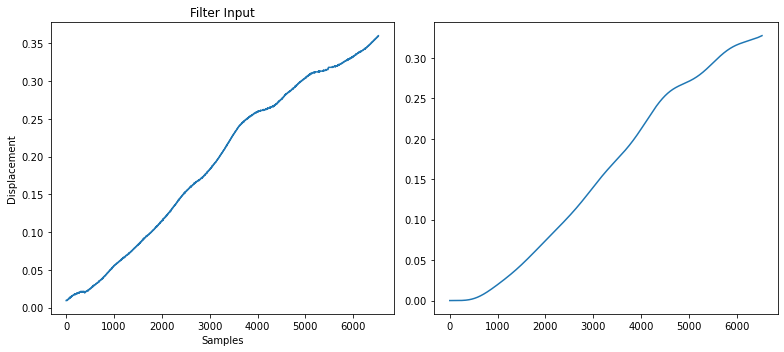

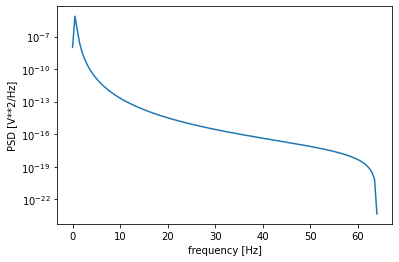

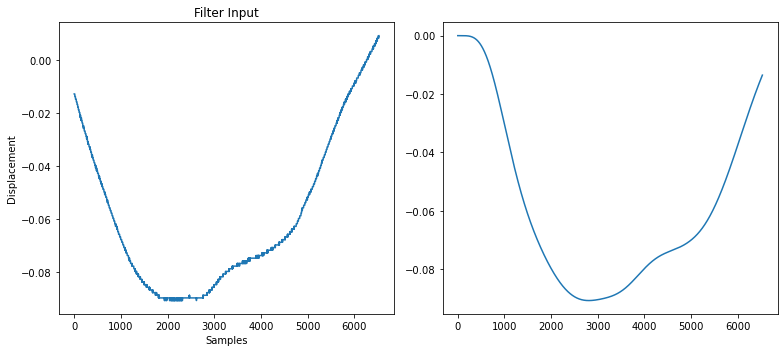

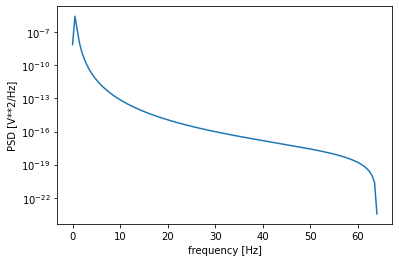

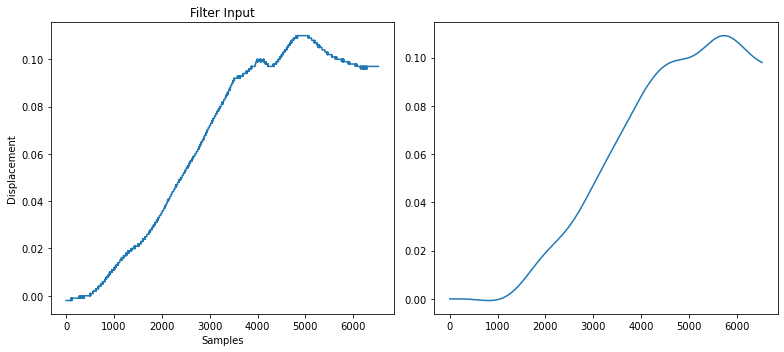

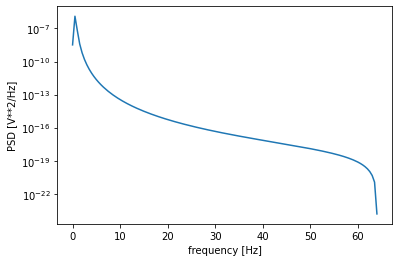

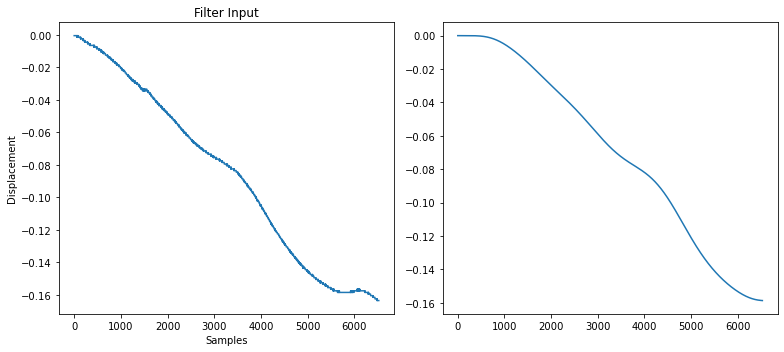

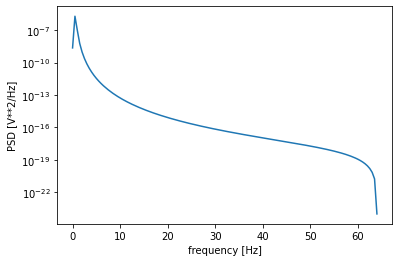

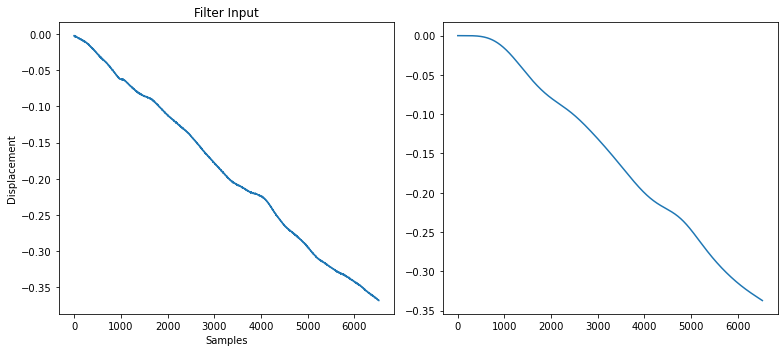

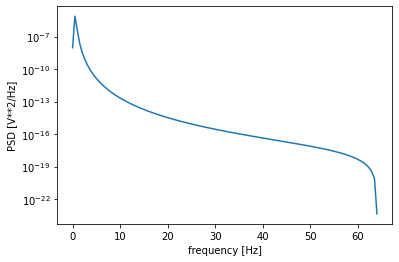

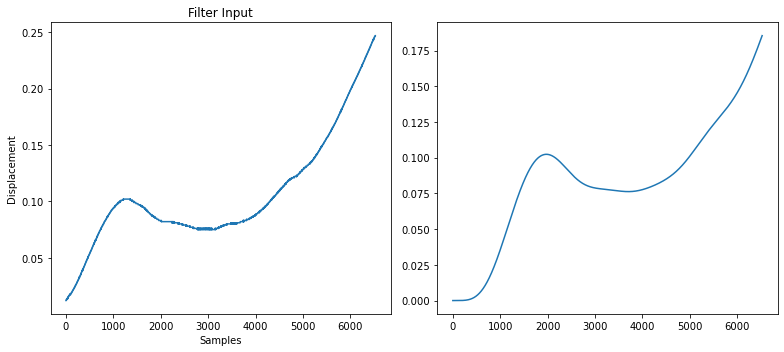

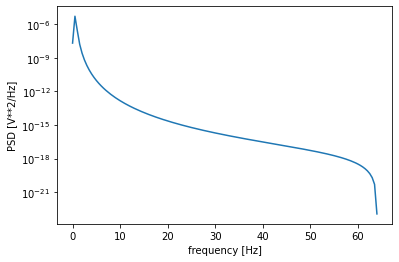

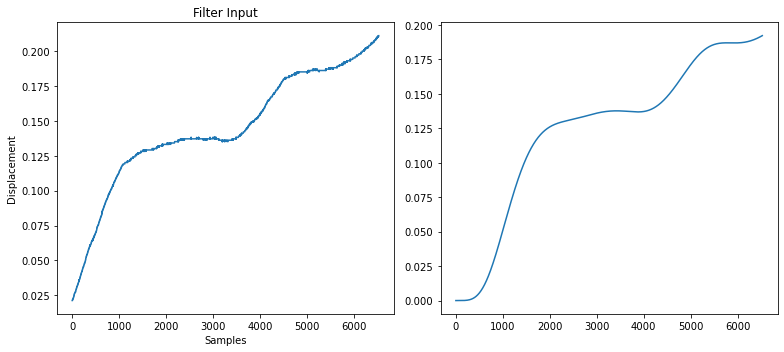

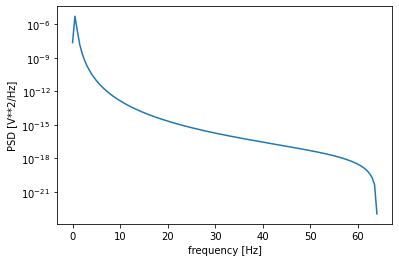

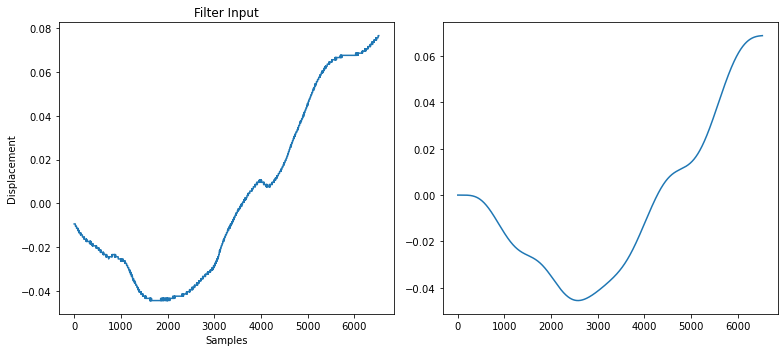

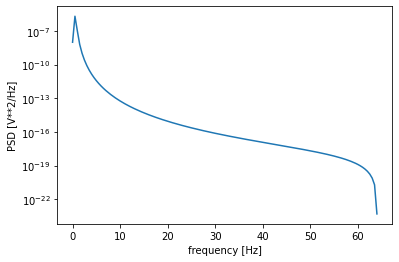

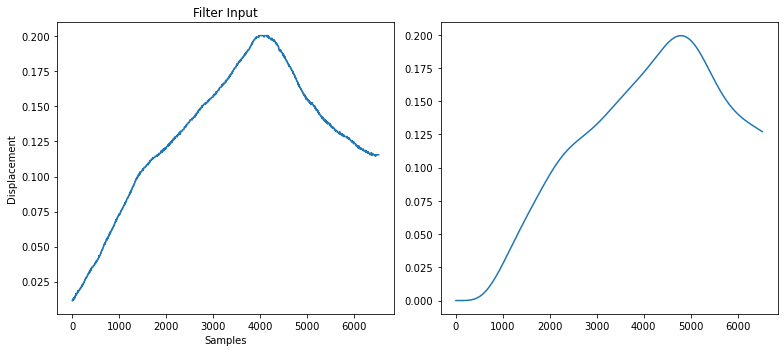

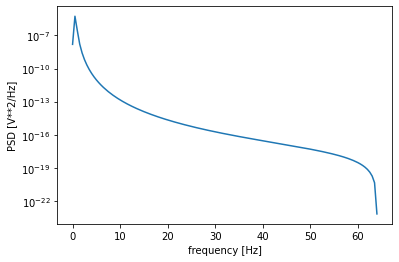

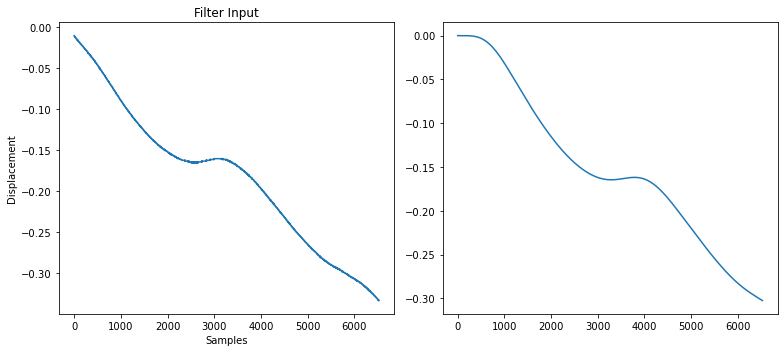

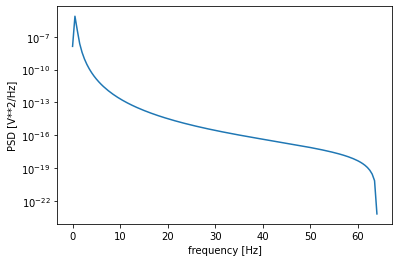

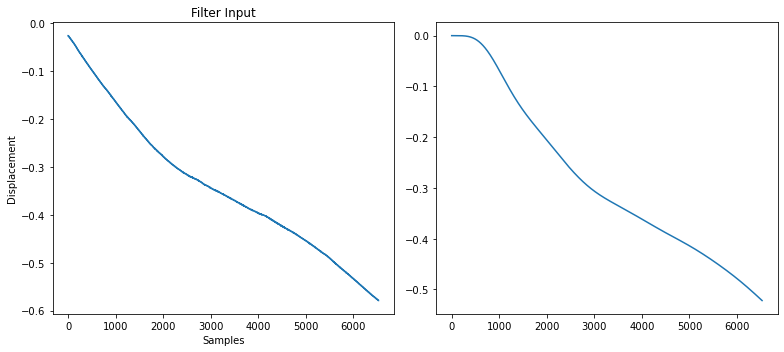

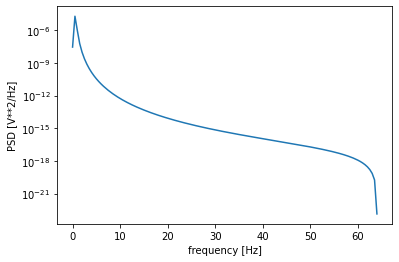

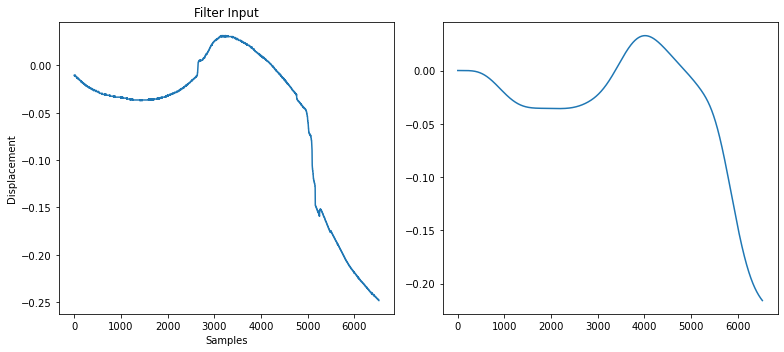

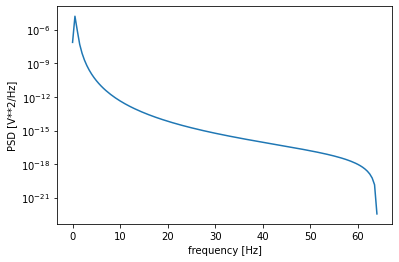

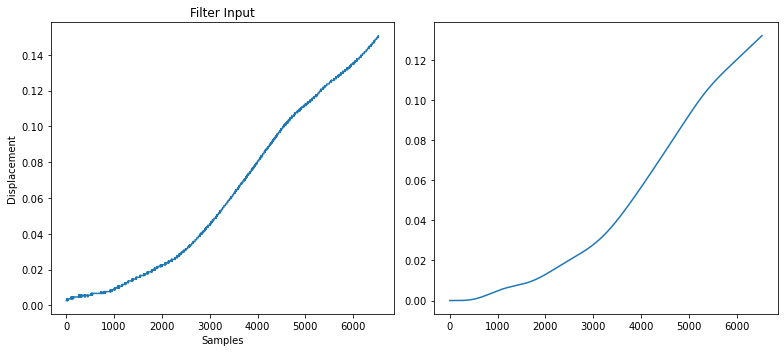

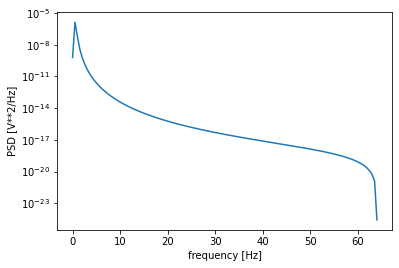

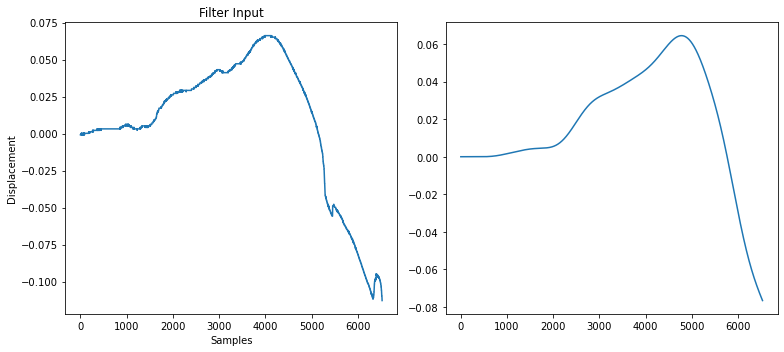

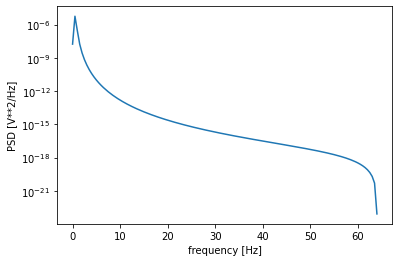

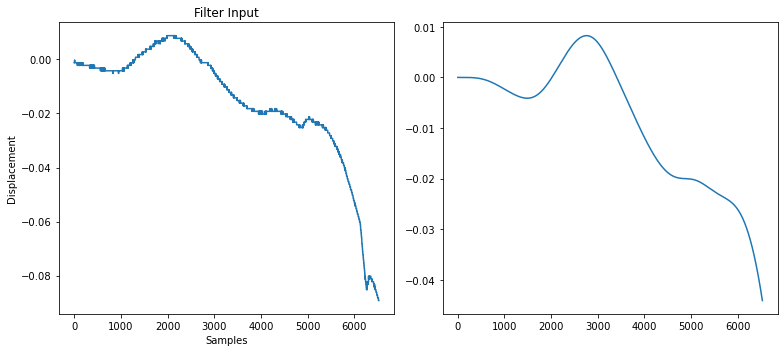

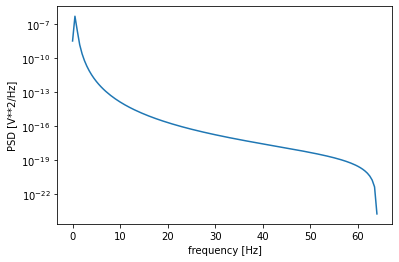

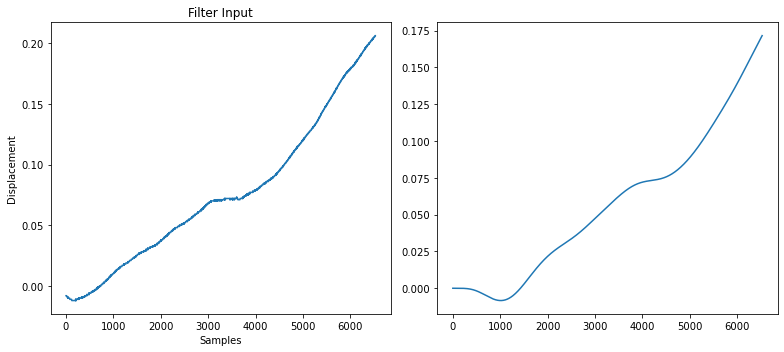

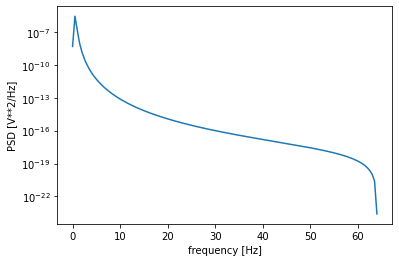

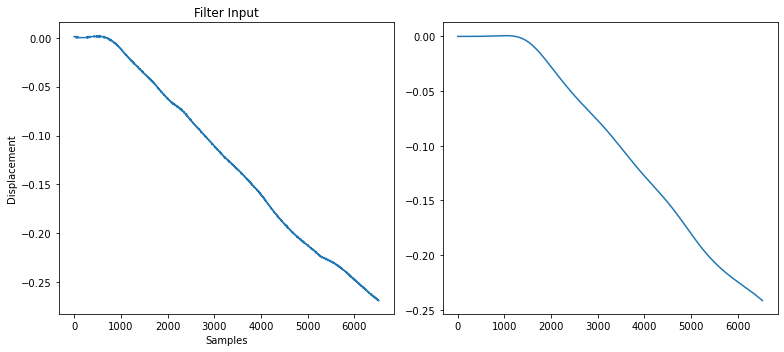

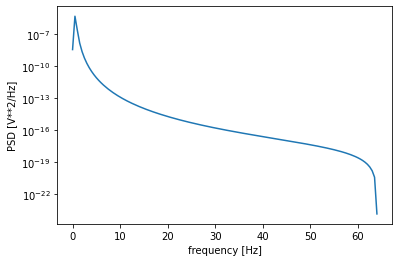

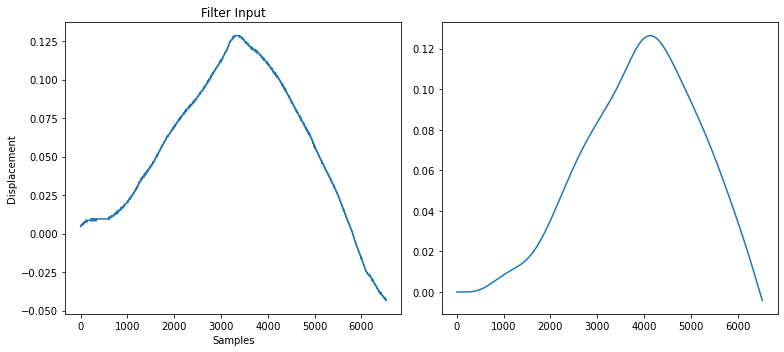

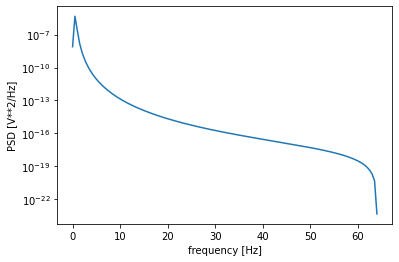

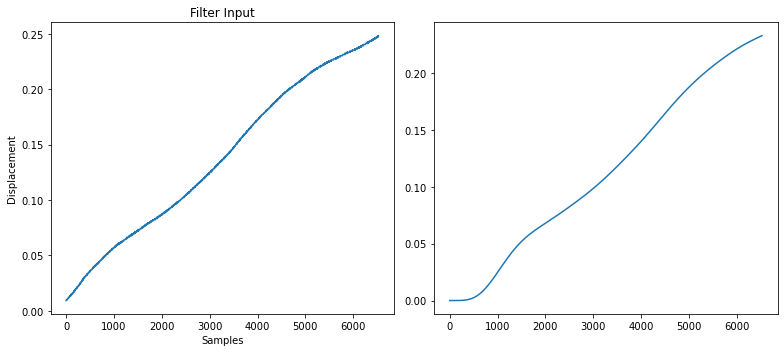

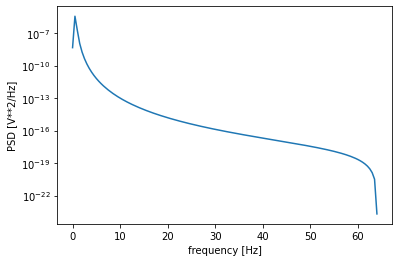

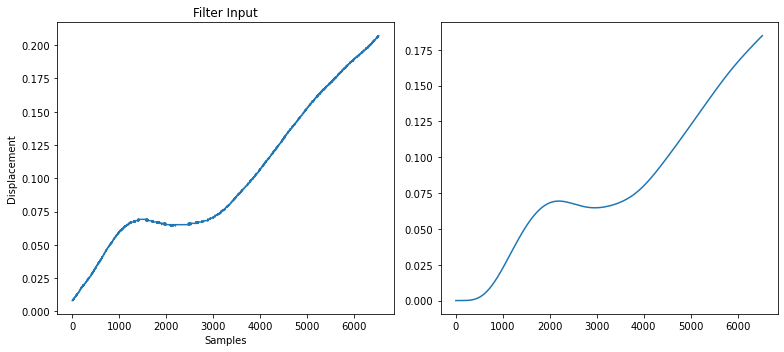

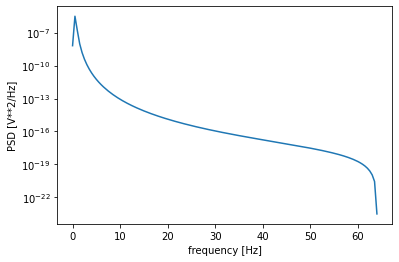

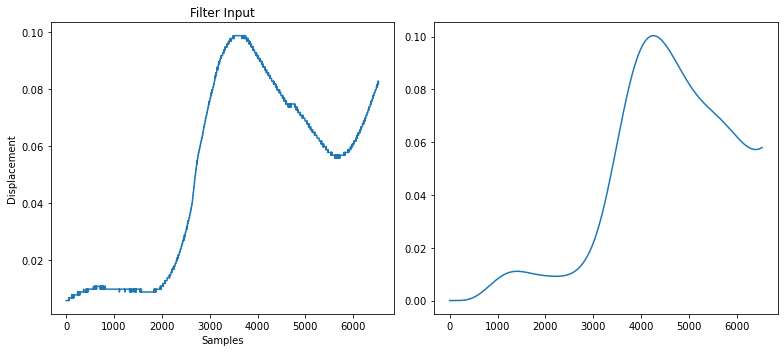

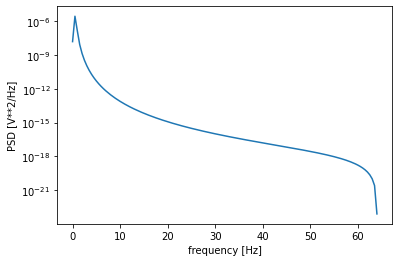

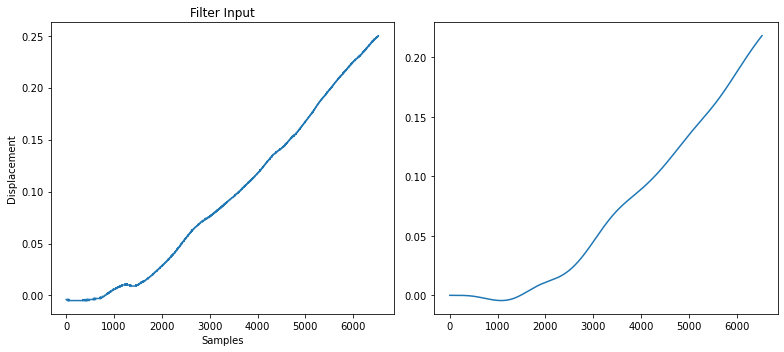

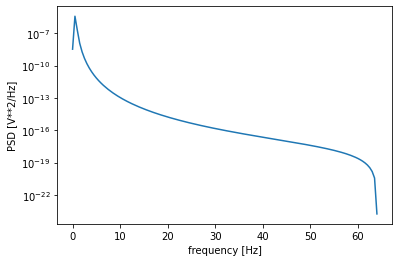

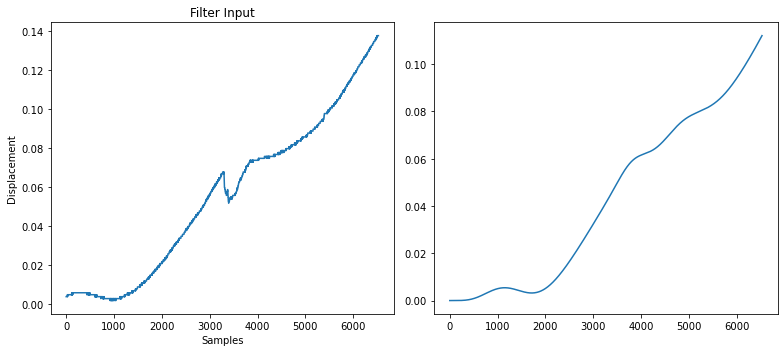

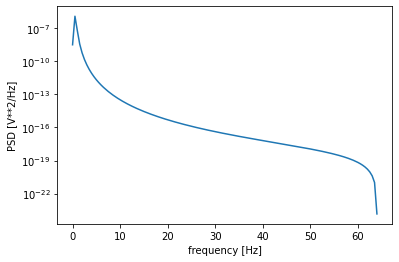

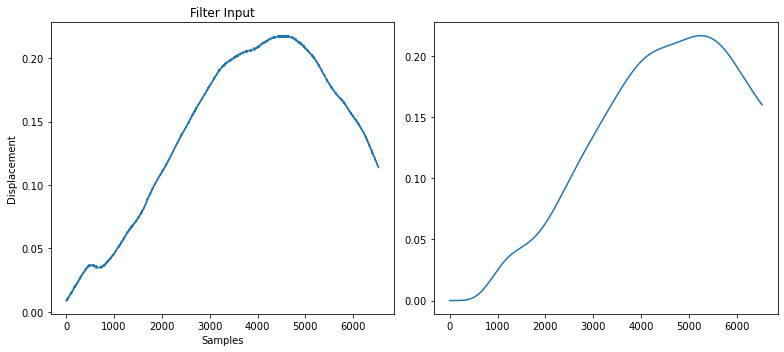

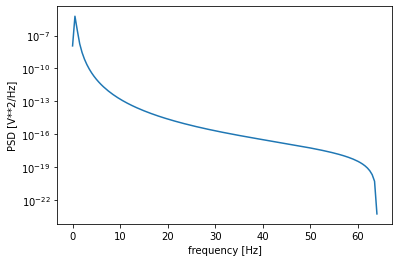

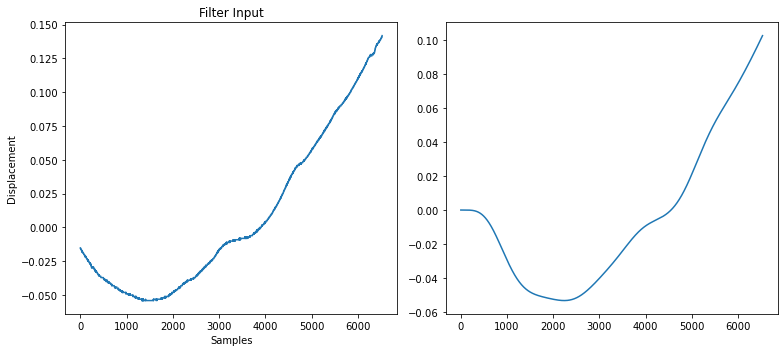

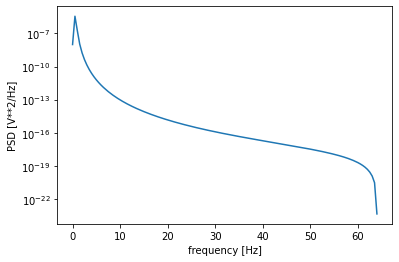

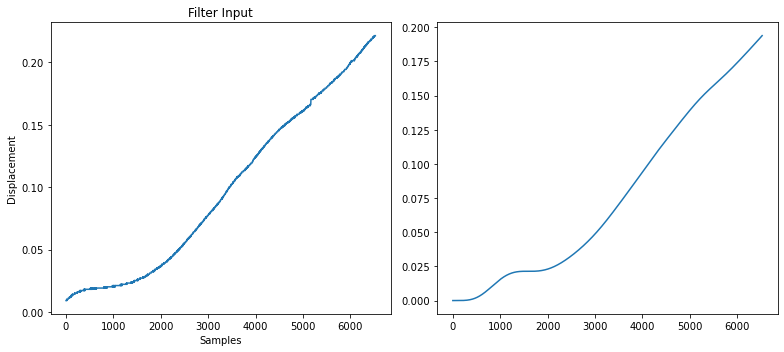

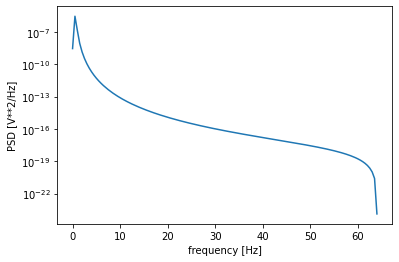

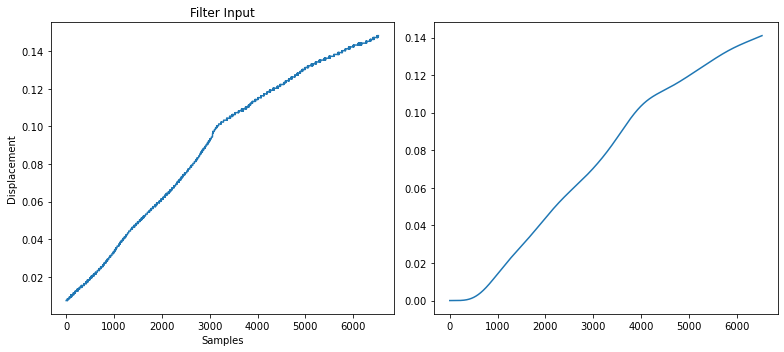

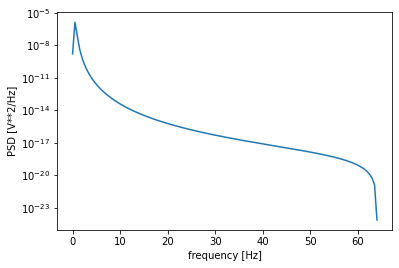

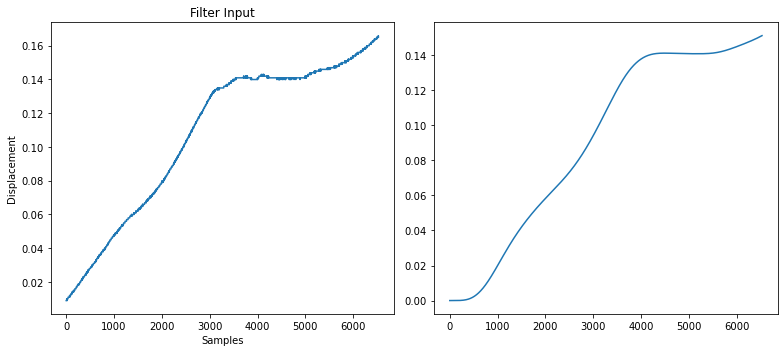

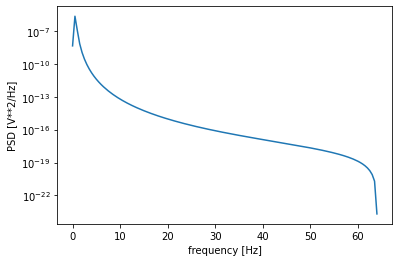

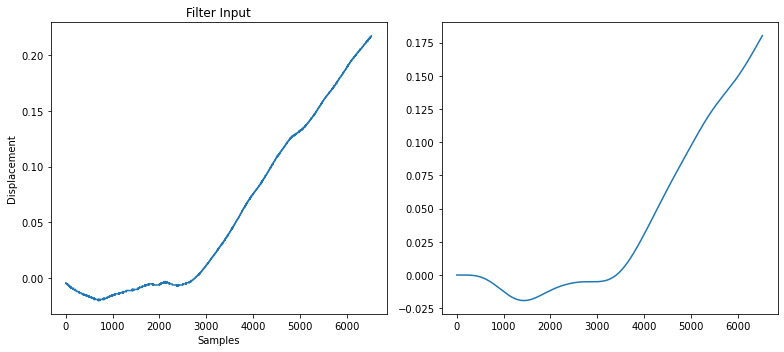

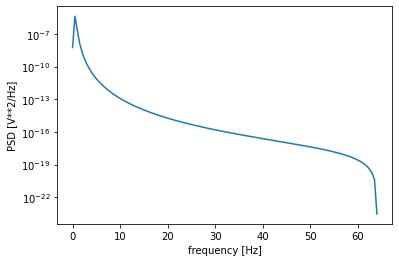

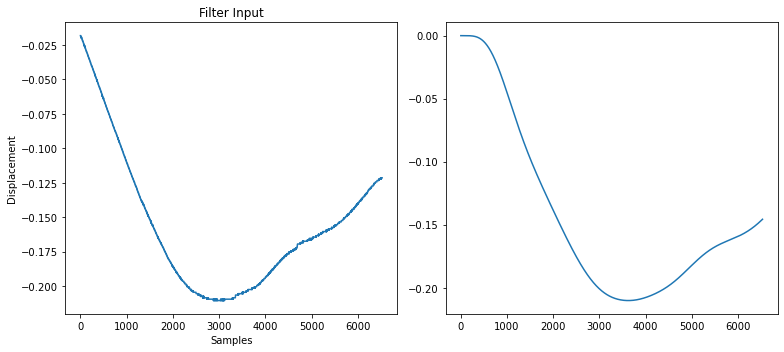

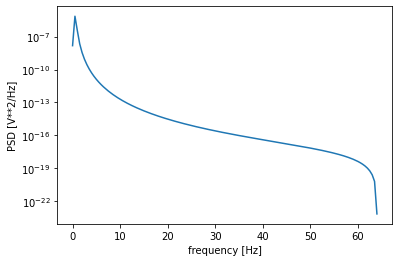

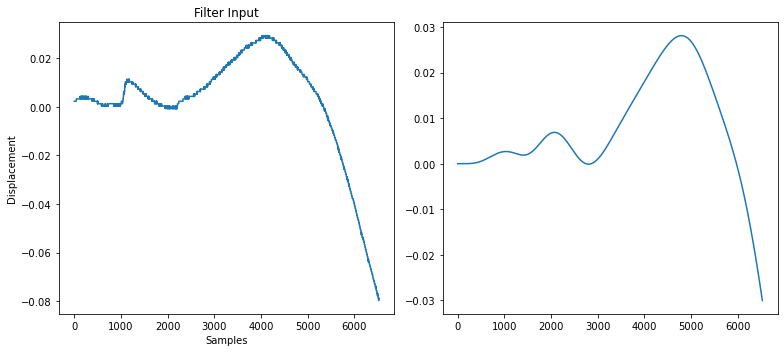

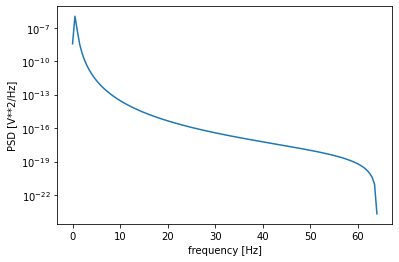

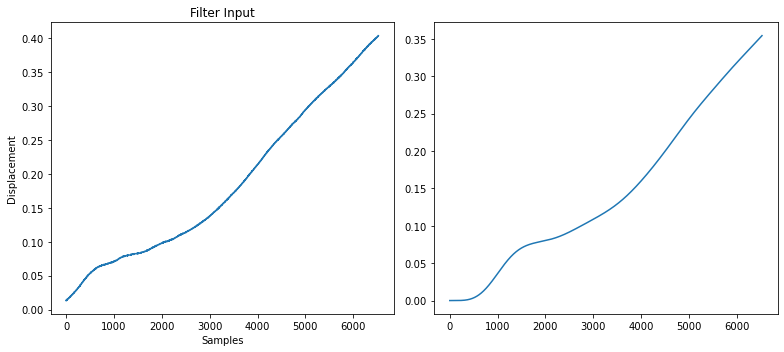

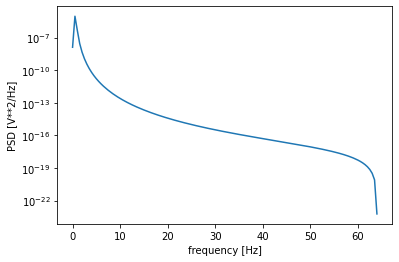

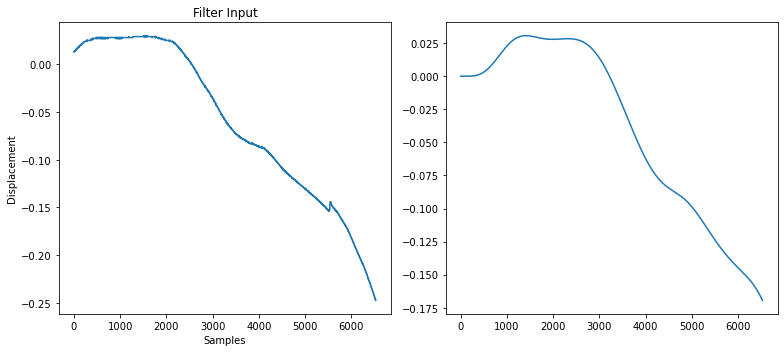

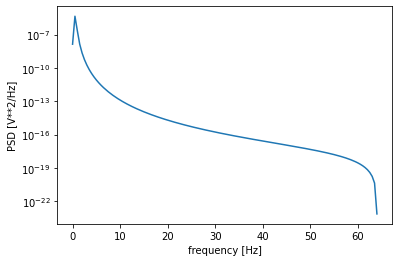

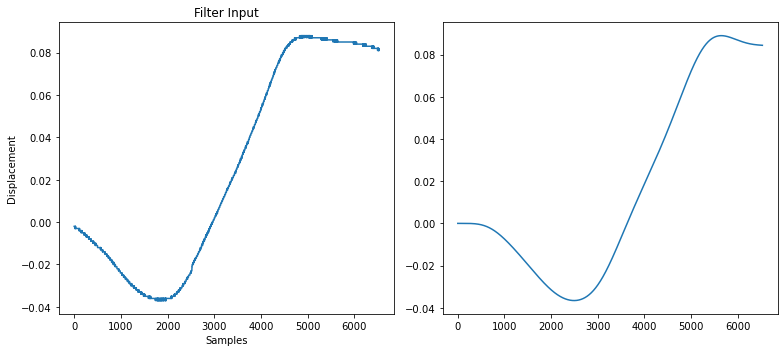

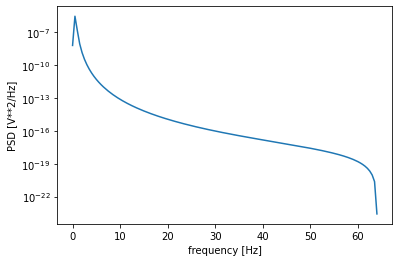

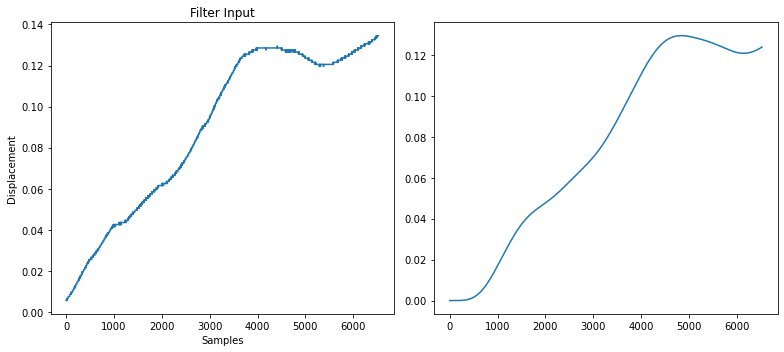

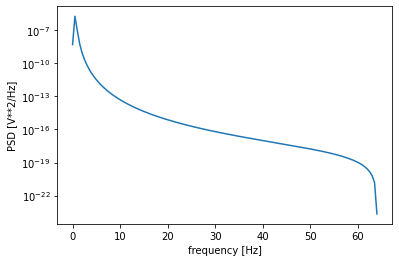

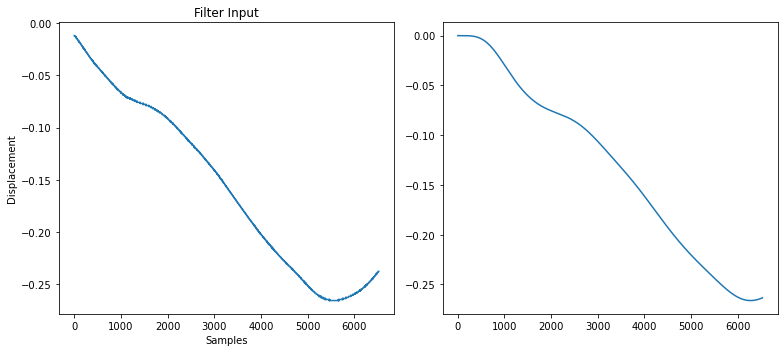

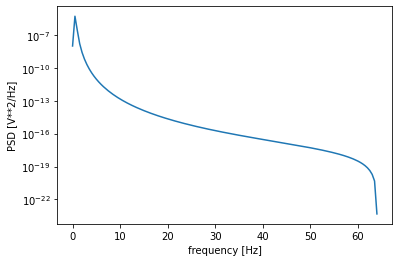

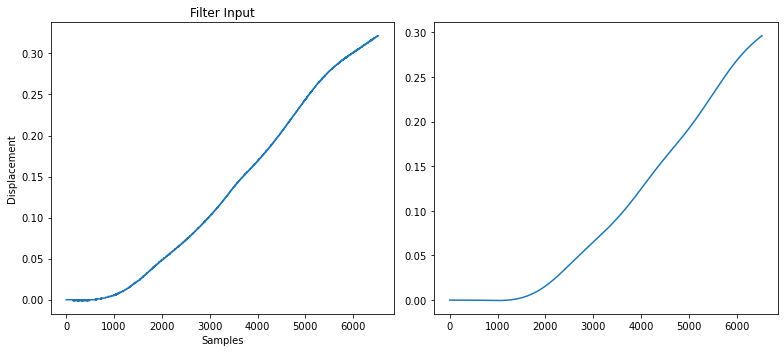

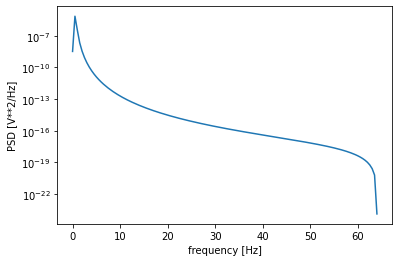

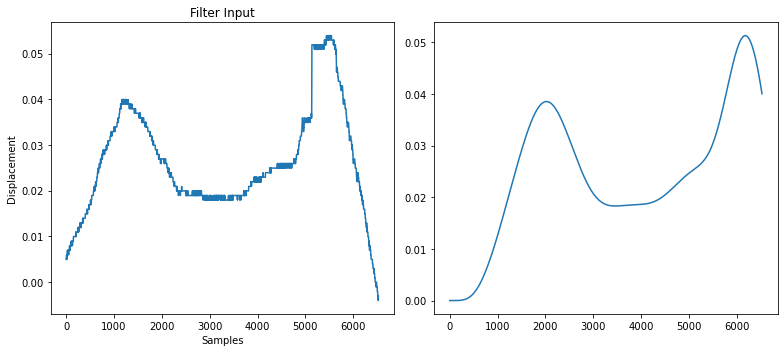

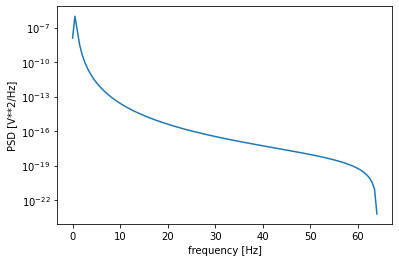

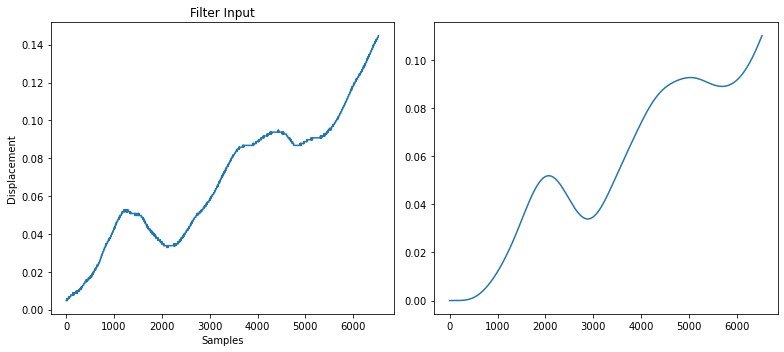

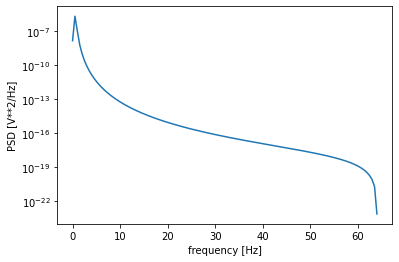

In [22]:
# spectral power in the band [0-0.1]Hz

def spec_01 (sig):

    sig_nor = sig / np.max(np.abs(sig))# Normalizacion option 2
    
    #buffer = sig_nor
    buffer = sig
    
    ##########################################
    sos = scipy.signal.butter(5, 0.1, btype='lowpass',analog=False, fs=128, output='sos')
    
    ts = len(Temperature)/128.
    time = np.linspace(0,ts,len(Temperature))

    plt.figure(figsize=(11,5))
    plt.subplot(121)
    plt.plot(buffer)
    #plt.ylim(bottom=-1, top=1)
    plt.title("Filter Input")
    plt.xlabel("Samples")
    plt.ylabel("Displacement")


    filtered = scipy.signal.sosfilt(sos, buffer)

    plt.subplot(122)
    plt.plot(filtered)
    #plt.axis([0, 1, -2, 2])
    #plt.label('Time [seconds]')
    plt.tight_layout()

    plt.show()

    f, Spec = scipy.signal.welch(filtered, fs=128, window='hann')
    #f, Spec = scipy.signal.welch(filtered, fs=128, nperseg=64)

    plt.semilogy(f, Spec)
    #plt.ylim([0.5e-3, 1])
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.show()


for x in range(40):
    spec_01(X[x,39,:])

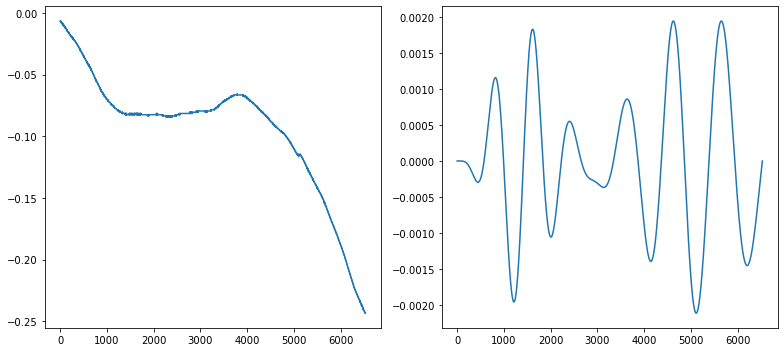

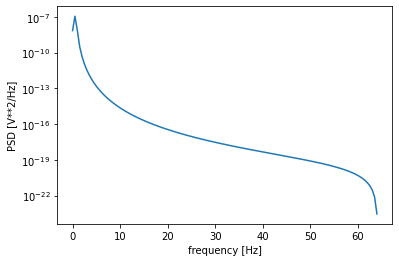

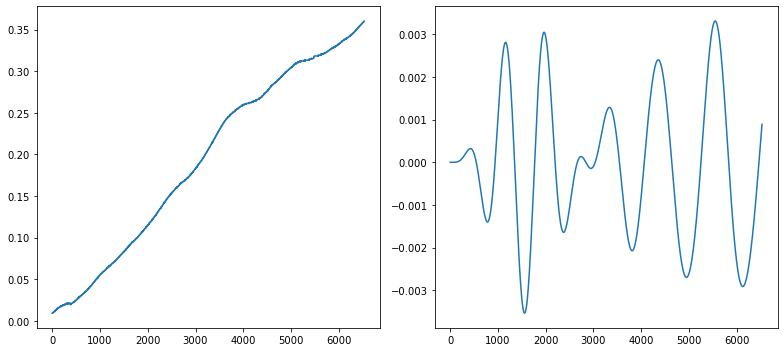

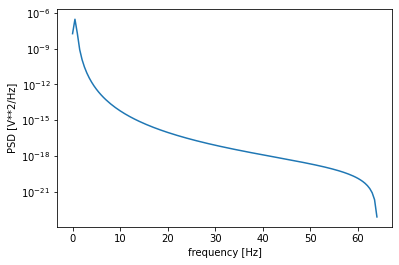

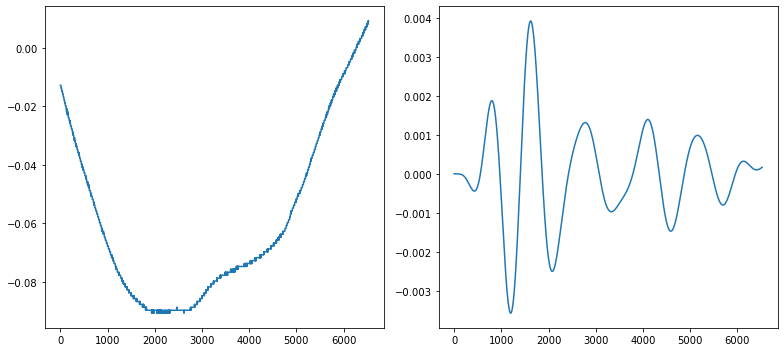

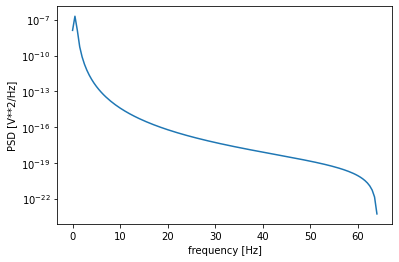

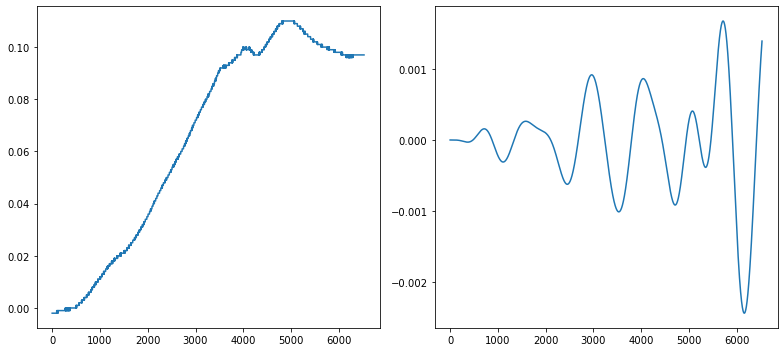

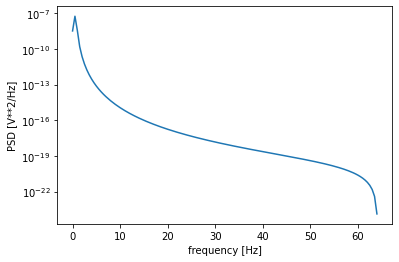

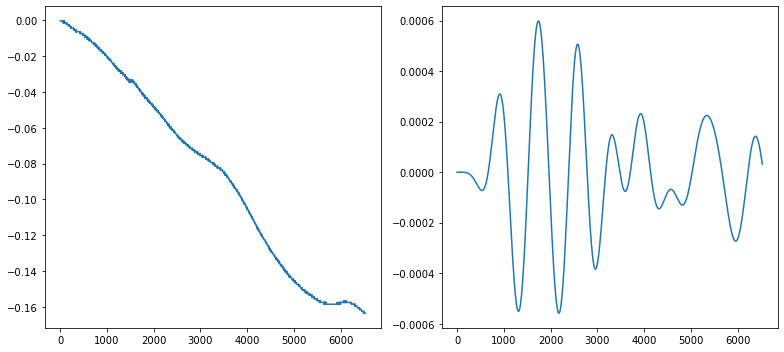

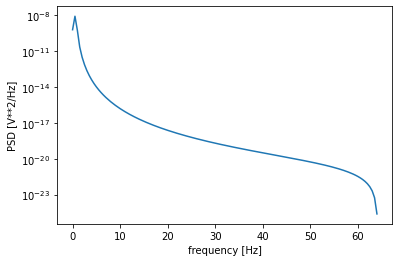

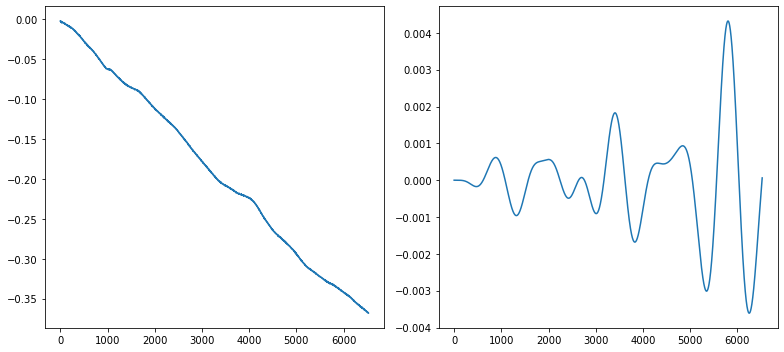

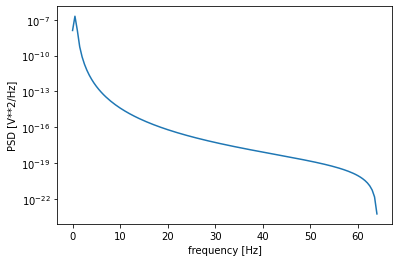

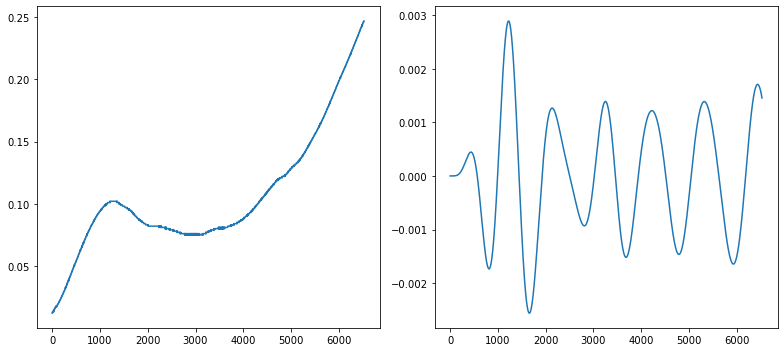

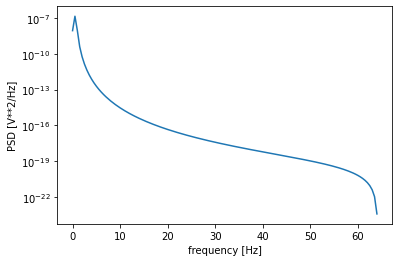

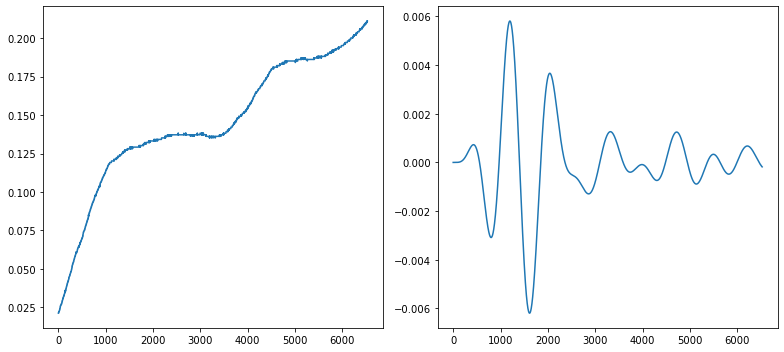

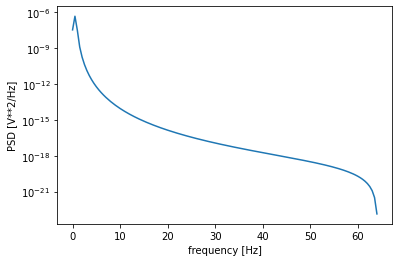

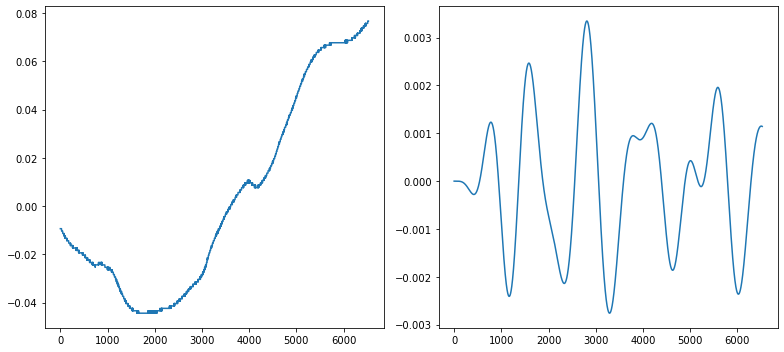

In [ ]:
# spectral power in the bands [0.1-0.2]Hz

def spec_02 (sig):

    sig_nor = sig / np.max(np.abs(sig))# Normalizacion option 2
    
    #buffer = sig_nor
    buffer = sig

    ##########################################
    sos = scipy.signal.butter(5, [0.1, 0.2], btype='bandpass',analog=False, fs=128, output='sos')
    
    ts = len(Temperature)/128.
    time = np.linspace(0,ts,len(Temperature))
    
    filtered = scipy.signal.sosfilt(sos, buffer)
    
    plt.figure(figsize=(11,5))
    plt.subplot(121)
    plt.plot(buffer)
    #plt.axis([0, 1, -2, 2])
    #plt.label('Time [seconds]')
    plt.tight_layout()

    plt.subplot(122)
    plt.plot(filtered)
    #plt.axis([0, 1, -2, 2])
    #plt.label('Time [seconds]')
    plt.tight_layout()

    plt.show()

    f, Spec = scipy.signal.welch(filtered, fs=128, window='hann')
    #f, Spec = scipy.signal.welch(filtered, fs=128, nperseg=64)

    plt.semilogy(f, Spec)
    #plt.ylim([0.5e-3, 1])
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.show()

for x in range(40):
    spec_02(X[x,39,:])

## Caracteristicas de patron de respiracion

In [ ]:
for trial in range(40):
    channel = 38 # canal de la señal fisiológica
    Respitarion = X[trial,channel-1,:] # : Saca toda la info
    #print(Temperature.shape)
    ts = len(Respitarion)/128.
    time = np.linspace(0,ts,len(Respitarion))
    fortitle = ('Video ',  trial+1, ' Respiration') 
    
    plt.plot(time,Respitarion)
    plt.title(fortitle)
    #plt.ylabel('uV')
    plt.xlabel('s')
    plt.show()

In [ ]:
# AVERAGE

# Average per video
for trial in range(40):
    channel = 38 # canal de la señal fisiológica
    Respitarion = X[trial,channel-1,:] # : Saca toda la info
    #print(Temperature.shape)
    average = np.mean(Respitarion)
    #fortitle = 'Video ', trial+1, 'AverageTemp= ', average
    print ('Video ', trial+1, 'AverageResp= ', average)

# Total average
Respitarion=[] 
for trial in range(40):
    channel = 38 # canal de la señal fisiológica
    Respitarion.extend(X[trial,channel-1,:]) 
print('\n',np.array(Respitarion).shape)
average = np.mean(Respitarion)
#fortitle = 'Video ', trial+1, 'AverageTemp= ', average
print ('La temperatura promedio durante toda la prueba fue ',average)

In [ ]:
# Average of its derivative
#&
#Standard_deviation

Respitarion = [ ]

for trial in range(40):
    channel = 38 # canal de la señal fisiológica
    Respitarion = X[trial,channel-1,:] # : Saca toda la info
    
    derivate=np.diff(Respitarion)
    standard_deviation = np.std(Respitarion)
    #print (derivate)
    average = np.mean(derivate)
    print ('\nVideo ', trial+1, 'AverageDiff= ', average)
    print ('Video ', trial+1, 'Standard_deviation= ', standard_deviation)

In [ ]:
# Spectral_centroid (breathing rhythm)


spec_centroid_total=[]

def spectral_centroid(x, samplerate=44100): # OPTION 1
    magnitudes = np.abs(np.fft.rfft(x)) # magnitudes of positive frequencies
    length = len(x)
    freqs = np.abs(np.fft.fftfreq(length, 1.0/samplerate)[:length//2+1]) # positive frequencies
    return np.sum(magnitudes*freqs) / np.sum(magnitudes) # return weighted mean

for trial in range(40):
    channel = 38 # canal de la señal fisiológica
    Respitarion = X[trial,channel-1,:] # : Saca toda la info  
    spec_centroid = spectral_centroid(Respitarion)
    print ('Video ', trial+1, 'Spectral centroid= ', spec_centroid)
    
    spec_centroid_total.append(spec_centroid) 

    
print((np.array(spec_centroid_total)))
time = np.linspace(1,40,40)

plt.grid()
plt.plot(time, spec_centroid_total,'dr')

